## Which NYC schools have the best math results?

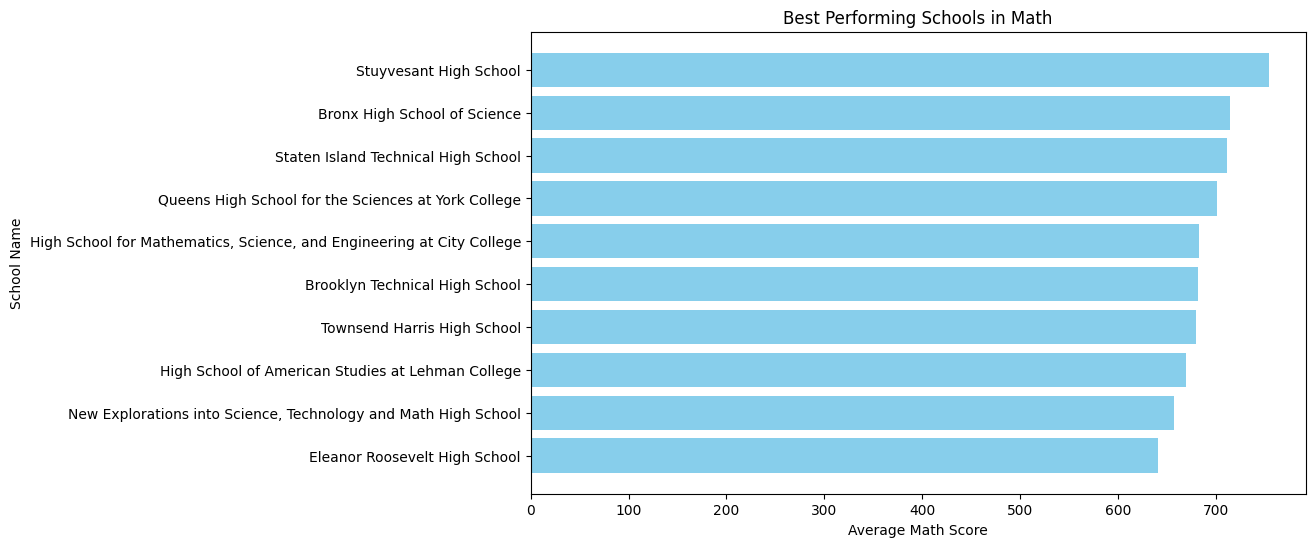

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

schools = pd.read_csv('../data/schools.csv')

schools.head()

schools['total_score'] = schools['average_math'] + schools['average_reading'] + schools['average_writing']

best_math_schools = schools[(schools['average_math'] / 800) * 100 >= 80]

best_math_schools = best_math_schools.sort_values('math_percentage', ascending=False)

best_math_schools[['school_name', 'average_math']]

plt.figure(figsize=(10, 6))
plt.barh(best_math_schools['school_name'], best_math_schools['average_math'], color='skyblue')
plt.xlabel('Average Math Score')
plt.ylabel('School Name')
plt.title('Best Performing Schools in Math')
plt.gca().invert_yaxis()
plt.show()


## What are the top 10 performing schools based on the combined SAT scores?

In [8]:
top_10_schools = schools.nlargest(10, 'total_score')[['school_name', 'total_score']]
top_10_schools = top_10_schools.rename(columns={'total_score': 'total_SAT'})
top_10_schools = top_10_schools.sort_values('total_SAT', ascending=False)

top_10_schools.head(10)





,school_name,total_SAT
88,Stuyvesant High School,2144
93,Staten Island Technical High School,2041
170,Bronx High School of Science,2041
174,High School of American Studies at Lehman College,2013
333,Townsend Harris High School,1981
365,Queens High School for the Sciences at York Co...,1947
5,Bard High School Early College,1914
280,Brooklyn Technical High School,1896
45,Eleanor Roosevelt High School,1889
68,"High School for Mathematics, Science, and Engi...",1889


## Which single borough has the largest standard deviation in the combined SAT score?

In [9]:
grouped = schools.groupby('borough').agg(
    num_schools=('total_score', 'size'),
    average_SAT=('total_score', 'mean'),
    std_SAT=('total_score', 'std')
).reset_index()

max_std_borough = grouped.loc[grouped['std_SAT'].idxmax()]

max_std_borough['num_schools'] = round(max_std_borough['num_schools'], 2)
max_std_borough['average_SAT'] = round(max_std_borough['average_SAT'], 2)
max_std_borough['std_SAT'] = round(max_std_borough['std_SAT'], 2)

result = pd.DataFrame([max_std_borough])

result

/tmp/ipykernel_14535/2266932784.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_std_borough['num_schools'] = round(max_std_borough['num_schools'], 2)
/tmp/ipykernel_14535/2266932784.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_std_borough['average_SAT'] = round(max_std_borough['average_SAT'], 2)
/tmp/ipykernel_14535/2266932784.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_std_borough['std_SAT'] = round(m

,borough,num_schools,average_SAT,std_SAT
2,Manhattan,89,1340.13,230.29


In [15]:
import re
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

schools = pd.read_csv('../data/schools.csv')

correlation_matrix = schools[['average_math', 'average_reading', 'average_writing', 'total_score']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of SAT Scores')
plt.show()


KeyError: "['total_score'] not in index"